## Trading Probability and Surplus

The point of this notebook is to compute the average number of trades and the expected surplus in the reverse directed search model 2 tier case.  The question is what happens when the difference in quality  between the 2 tiers increases.  This is part of a bigger question about what happens when the accuracy of the mapinator classification improves.  Does this create enough friction (competition for the top tier candates) to make things worse off.

In [1]:
using SymPy, Plots
x,z,y, v_1, v_2, n, m_1, m_2 = symbols("x,z,y, v_1, v_2, n, m_1, m_2")

(x, z, y, v_1, v_2, n, m_1, m_2)

There are two functions
$$
Q_1(x) = (1-\overline{\pi}\frac{(F(x^\ast)-F(x))}{m_1}-\frac{1-F(x^\ast)}{m_1})^{(n-1)}
$$
when $x<x^\ast$ and
$$
Q_1(x) = (1-(\frac{1-F(x)}{m_1}))^{n-1}
$$
otherwise.

In [2]:
# find the cutoff
rhs = v_1*((1-(1-y)/(m_1))^(n-1))
z=solve(v_2-rhs,y)[1]

         1           
       ─────         
       n - 1         
   ⎛v₂⎞              
m₁⋅⎜──⎟      - m₁ + 1
   ⎝v₁⎠              

In [3]:

pi =(v_2/v_1)^(1/(n-1))*m_1/m_2/(1+(v_2/v_1)^(1/(n-1))*m_1/m_2)

              1      
            ─────    
            n - 1    
        ⎛v₂⎞         
     m₁⋅⎜──⎟         
        ⎝v₁⎠         
─────────────────────
   ⎛         1      ⎞
   ⎜       ─────    ⎟
   ⎜       n - 1    ⎟
   ⎜   ⎛v₂⎞         ⎟
   ⎜m₁⋅⎜──⎟         ⎟
   ⎜   ⎝v₁⎠         ⎟
m₂⋅⎜──────────── + 1⎟
   ⎝     m₂         ⎠

In [4]:
Q_1 = (1-(max(z-x,0)*pi)/m_1 - ((1-max(z,x))/m_1))^(n-1)

                                                                              
⎛          1                                                                  
⎜        ─────                                                                
⎜        n - 1                                                                
⎜    ⎛v₂⎞                                                                     
⎜    ⎜──⎟     ⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x + 1)               
⎜    ⎝v₁⎠                                                         1 - Max(x, m
⎜1 - ────────────────────────────────────────────────────────── - ────────────
⎜                         ⎛         1      ⎞                                  
⎜                         ⎜       ─────    ⎟                                  
⎜                         ⎜       n - 1    ⎟                                  
⎜                         ⎜   ⎛v₂⎞         ⎟                                  
⎜                         ⎜m₁⋅⎜──⎟         ⎟        

In [17]:
pbar = sympy.Piecewise((pi, Lt(x,z)), (1, Ge(x,z)))

⎧              1                                     
⎪            ─────                                   
⎪            n - 1                       1           
⎪        ⎛v₂⎞                          ─────         
⎪     m₁⋅⎜──⎟                          n - 1         
⎪        ⎝v₁⎠                      ⎛v₂⎞              
⎪─────────────────────  for x < m₁⋅⎜──⎟      - m₁ + 1
⎪   ⎛         1      ⎞             ⎝v₁⎠              
⎨   ⎜       ─────    ⎟                               
⎪   ⎜       n - 1    ⎟                               
⎪   ⎜   ⎛v₂⎞         ⎟                               
⎪   ⎜m₁⋅⎜──⎟         ⎟                               
⎪   ⎜   ⎝v₁⎠         ⎟                               
⎪m₂⋅⎜──────────── + 1⎟                               
⎪   ⎝     m₂         ⎠                               
⎪                                                    
⎩          1                      otherwise          

In [23]:
Q_2 = (1-max(z-x,0)*(1-pi)/m_2)^(n-1)

                                                                              
⎛    ⎛                1          ⎞                                            
⎜    ⎜              ─────        ⎟                                            
⎜    ⎜              n - 1        ⎟                                            
⎜    ⎜          ⎛v₂⎞             ⎟                                            
⎜    ⎜       m₁⋅⎜──⎟             ⎟                                            
⎜    ⎜          ⎝v₁⎠             ⎟                                            
⎜    ⎜- ───────────────────── + 1⎟⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x
⎜    ⎜     ⎛         1      ⎞    ⎟                                            
⎜    ⎜     ⎜       ─────    ⎟    ⎟                                            
⎜    ⎜     ⎜       n - 1    ⎟    ⎟                                            
⎜    ⎜     ⎜   ⎛v₂⎞         ⎟    ⎟                                            
⎜    ⎜     ⎜m₁⋅⎜──⎟         ⎟    ⎟                  

In [8]:
Prob1 = pbar*Q_1
Prob2 = (1-pbar)*Q_2

                                                                              
⎛    ⎛                1          ⎞                                            
⎜    ⎜              ─────        ⎟                                            
⎜    ⎜              n - 1        ⎟                                            
⎜    ⎜          ⎛v₂⎞             ⎟                                            
⎜    ⎜       m₁⋅⎜──⎟             ⎟                                            
⎜    ⎜          ⎝v₁⎠             ⎟                                            
⎜    ⎜- ───────────────────── + 1⎟⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x
⎜    ⎜     ⎛         1      ⎞    ⎟                                            
⎜    ⎜     ⎜       ─────    ⎟    ⎟                                            
⎜    ⎜     ⎜       n - 1    ⎟    ⎟                                            
⎜    ⎜     ⎜   ⎛v₂⎞         ⎟    ⎟                                            
⎜    ⎜     ⎜m₁⋅⎜──⎟         ⎟    ⎟                  

In [18]:
function p_lot(x,y)
    plot(Prob1(m_1 => x[1],m_2=>x[2],v_1=>x[3],v_2=>x[4],n=>x[5]),0,1)
    plot!(Prob1(m_1 => y[1],m_2=>y[2],v_1=>y[3],v_2=>y[4],n=>y[5]),0,1)
    plot!(Prob2(m_1 => x[1],m_2=>x[2],v_1=>x[3],v_2=>x[4],n=>x[5]),0,1)
    plot!(Prob2(m_1 => y[1],m_2=>y[2],v_1=>y[3],v_2=>y[4],n=>y[5]),0,1)
end

p_lot (generic function with 1 method)

In [19]:
#m_1 => 7,m_2=>7,v_1=>.65,v_2=>.65,n=>14
a = [7,7,.65,.65,14]
b = [7,7,.8,.5,14]
p_lot(a,b)

LoadError: MethodError: no method matching *(::Float64, ::Nothing)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *(::T, [91m::T[39m) where T<:Union{Float16, Float32, Float64} at float.jl:385
[0m  *(::Union{Float16, Float32, Float64}, [91m::BigFloat[39m) at mpfr.jl:414
[0m  ...

In [11]:
Prob=pi*Q_1+(1-pi)*Q_2
surplus=pi*v_1*Q_1+(1-pi)*v_2*Q_2

                                                                              
                ⎛          1                                                  
                ⎜        ─────                                                
            1   ⎜        n - 1                                                
          ───── ⎜    ⎛v₂⎞                                                     
          n - 1 ⎜    ⎜──⎟     ⋅Max(0, m_1*(v_2/v_1)**(1/(n - 1)) - m_1 - x + 1
      ⎛v₂⎞      ⎜    ⎝v₁⎠                                                     
m₁⋅v₁⋅⎜──⎟     ⋅⎜1 - ─────────────────────────────────────────────────────────
      ⎝v₁⎠      ⎜                         ⎛         1      ⎞                  
                ⎜                         ⎜       ─────    ⎟                  
                ⎜                         ⎜       n - 1    ⎟                  
                ⎜                         ⎜   ⎛v₂⎞         ⎟                  
                ⎜                         ⎜m₁⋅⎜──⎟  

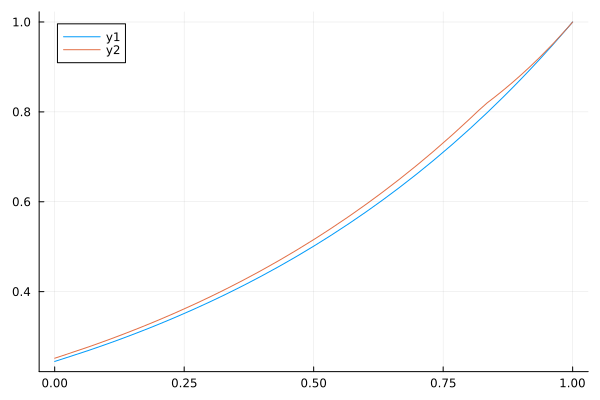

In [12]:
plot(Prob(m_1 => 7,m_2=>7,v_1=>.65,v_2=>.65,n=>20),0,1)
plot!(Prob(m_1 => 7,m_2=>7,v_1=>.8,v_2=>.5,n=>20),0,1)

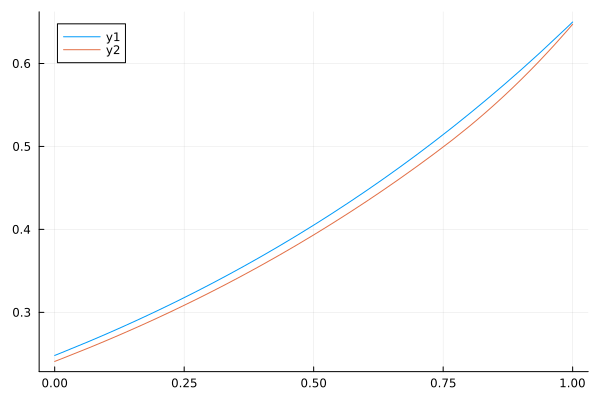

In [13]:
plot(surplus(m_1 => 7,m_2=>7,v_1=>.65,v_2=>.65,n=>14),0,1)
plot!(surplus(m_1 => 7,m_2=>7,v_1=>.8,v_2=>.5,n=>14),0,1)